In [8]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns

# Exercício 1

In [3]:
pop = stats.expon.rvs(scale=300, size = 10000)
mediana = np.median(pop)

In [4]:
n = 30
t = stats.t(df=n).ppf((0.05, 0.95))
estimativas = []
p = 0
mds = []
for i in range(100):
    amostra = pop[stats.randint.rvs(0,len(pop),size=n)]
    md = np.median(amostra)
    var = amostra.var()
    ic = [md + t*(var/n-1)**(1/2)]
    estimativas.append(ic)
    mds.append(md)
    if mediana >= ic[0][0] and mediana <= ic[0][1]:
        p = p + 1
    ic_mediana_bootstrap = np.median(estimativas) + t*(var/n-1)**(1/2)

print("Proporção de intervalos que contiveram o parâmetro: ", p/100, "\n Intervalo de confiança 90% bootstrap para a mediana da população: ", ic_mediana_bootstrap)


Proporção de intervalos que contiveram o parâmetro:  0.88 
 Intervalo de confiança 90% bootstrap para a mediana da população:  [122.50978384 284.16839163]


## Em ambos os casos, o verdadeiro valor foi bem estimado pelo método bootstrap.
### No caso do intervalo pontual, porém, apesar da estimativa pontual estar bem próxima ao verdadeiro valor, a amplitude do intervalo ainda é um pouco grande demais..

# Exercício 2

In [5]:
data = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
data.head(3)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [6]:
valores = data.groupby("am")["mpg"].mean()
dif = data.groupby("am")["mpg"].mean()[1] - data.groupby("am")["mpg"].mean()[0]
print("Médias:", valores, "\n Diferença:", dif)

Médias: am
0    17.147368
1    24.392308
Name: mpg, dtype: float64 
 Diferença: 7.24493927125506


In [13]:
difs = []
for i in range(1000):
    amostra = data["mpg"].sample(n=19, replace=False)
    difs.append(amostra.mean() - data["mpg"].drop(amostra.index).mean())
med = np.array(difs).mean()

print("Média das diferenças:", med,"\n Diferenças:" , difs)

Média das diferenças: -0.014027530364373639 
 Diferenças: [-0.3655870445344114, -2.2570850202429114, 0.8651821862348221, -4.718623481781371, -2.9178137651821885, 1.1242914979757082, 1.9923076923076906, 0.8522267206477707, 1.9145748987854212, -1.3113360323886667, -0.6635627530364374, -0.6376518218623488, 0.3080971659918994, -0.06761133603238889, -0.7801619433198397, -0.22307692307691696, -3.2805668016194254, 0.07489878542509842, -0.10647773279352535, 0.4506072874493938, 1.4870445344129557, -1.4020242914979768, -0.23603238866397191, 2.07004048582996, -0.7412955465586997, 2.9769230769230717, -1.881376518218623, -2.0497975708501954, -0.5728744939271309, 1.2927125506072805, -0.9097165991902934, 4.700000000000003, 3.663562753036434, -2.671659919028336, 3.780161943319836, 1.3445344129554648, -2.0757085020242947, 0.8522267206477707, 2.4975708502024254, -2.788259109311742, 0.17854251012145994, 1.4222672064777306, 1.2149797570850147, -3.448987854251012, 1.3963562753036456, 3.5599190283400794, 1.

Daqui, vemos que existe diferença entre dividir aleatoriamente um grupo com n=13 e outro com n=19 e calcular a média do mpg, de selecionar a amostra em que am = 0 e am = 1 e calcular essas médias para cada amostra. Ou seja, o valor de am aparenta influenciar diretamente na média de mpg, rejeitando assim empiricamente a hipótese nula proposta, de igualdade de médias entre carros automáticos e manuais.

<Axes: ylabel='Count'>

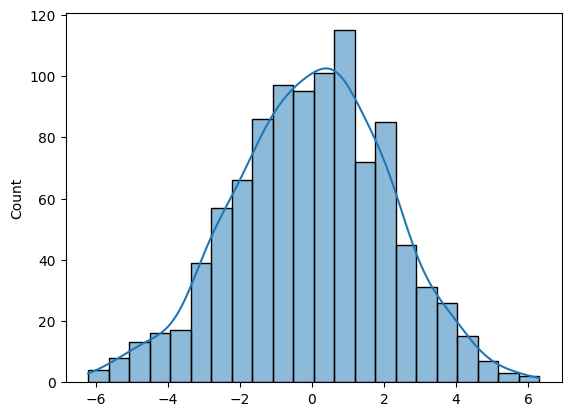

In [14]:
sns.histplot(difs,kde=True)

In [15]:
np.quantile(difs,[.025,.975])

array([-4.47376518,  4.07846154])

# p-valor:

In [18]:
(np.array(difs) > 7.245).mean()

0.0